<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий на hh.ru
   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import gdown

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [25]:
# Задаем ссылку для файла, который находится на Google Drive
urls_dict = {
    "dst-3.0_16_1_hh_database": ("https://drive.google.com/uc?export=download&id=1v0uWfDInCNuL97z9ywFM4knTIhS6reQ8", "csv"),
    "ExchangeRates": ("https://drive.google.com/uc?export=download&id=1BrlaIIqz1yIYoxTqIBE09-vcxQPlOgGb", "csv")
            }

# Загружаем файлы
for file_name, attributes in urls_dict.items():
    url = attributes[0]
    extension = attributes[1]
    gdown.download(
        url, 
        f"./{file_name}.{extension}", 
        quiet=True
        ) 

In [2]:
hh_dd = pd.read_csv('dst-3.0_16_1_hh_database.csv', sep = ';')
hh_dd_copy = hh_dd.copy()

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [4]:
print("\n")
print("Первые 3 строки:")
display(hh_dd_copy.head(3))

print("\n")
print("Последние 3 строки:")
display(hh_dd_copy.tail(3))




Первые 3 строки:


,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано




Последние 3 строки:


,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
44741,"Женщина , 48 лет , родилась 26 декабря 1970",40000 руб.,"Аналитик данных, Математик","Челябинск , готова к переезду , готова к редки...",полная занятость,"полный день, удаленная работа",Опыт работы 21 год 5 месяцев Январь 1998 — по...,"ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,Высшее образование 2000 Южно-Уральский госуда...,09.04.2019 05:07,Не указано
44742,"Мужчина , 24 года , родился 6 октября 1994",20000 руб.,Контент-менеджер,"Тамбов , не готов к переезду , не готов к кома...","частичная занятость, полная занятость",удаленная работа,Опыт работы 3 года 10 месяцев Контент-менедже...,IQ-Maxima,Менеджер проектов,Высшее образование 2015 Тамбовский государств...,26.04.2019 14:25,Имеется собственный автомобиль
44743,"Мужчина , 38 лет , родился 25 апреля 1980",120000 руб.,Руководитель проекта,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 15 лет 10 месяцев Руководитель пр...,ПАО ГК ТНС энерго,Руководитель отдела технической поддержки,Высшее образование 1997 Южно-Российский госуд...,05.07.2018 20:15,Не указано


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4. Обратите внимание на информацию о числе непустых значений.

In [5]:
hh_dd_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

5. Выведите основную статистическую информацию о столбцах.

In [6]:
display(hh_dd_copy.describe())

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 2010 Московский государств...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [3]:
# Функция определяющая уровень образования
def education_level(value):
    names = ["высшее", "неоконченное высшее", "среднее специальное", "среднее"]
    len_raw = value.split(' ')
    new_word = ''

    if (len_raw[0].lower() + ' ' + len_raw[1].lower()) in names:
        new_word = len_raw[0].lower() + ' ' + len_raw[1].lower()    
    elif len_raw[0].lower() in names and new_word == '':
        new_word = len_raw[0].lower()
    return new_word        
            
hh_dd_copy['Образование'] = hh_dd_copy['Образование и ВУЗ'].apply(education_level)
hh_dd_copy = hh_dd_copy.drop('Образование и ВУЗ', axis=1)
# Проверка результатов
hh_dd_copy['Образование'].value_counts()

высшее                 33863
среднее специальное     5765
неоконченное высшее     4557
среднее                  559
Name: Образование, dtype: int64

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [4]:
# Функция определяющая пол
def sex(value):
    word_list = value.split(' ,')
    new_word = ''
    
    if word_list[0] == 'Мужчина':
        return 'М'
    elif word_list[0] == 'Женщина':
        return 'Ж'

# Функция определяющая возраст    
def age(value):
    word_list = value.split(' , ')
    age_list = word_list[1].split(' ')

    age = int(age_list[1])
    return age
            
hh_dd_copy['Пол'] = hh_dd_copy['Пол, возраст'].apply(sex)
hh_dd_copy['Возраст'] = hh_dd_copy['Пол, возраст'].apply(age)

# Проверка результатов
print('Процентов женских резюме -', round(hh_dd_copy['Пол'].value_counts(normalize=True)['Ж']*100, 2))
print('Средний возраст соискателей -', round(hh_dd_copy['Возраст'].mean(), 1))

# Удаляем ненужную колонку
hh_dd_copy = hh_dd_copy.drop('Пол, возраст', axis=1)

Процентов женских резюме - 19.07
Средний возраст соискателей - 32.2


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [5]:
# Функция определяющая опыт работы
def tenure(value):
    month_words = ['месяц', 'месяцев', 'месяца']
    year_words = ['год', 'года', 'лет']
    year = 0
    month = 0
        
    if value is np.nan or value == 'Не указано':
        return np.nan
        
    value_list = value.split(' ')[:7]
      
    for index, item in enumerate(value_list):
        if item in month_words:
            month = int(value_list[index-1])
        elif item in year_words:
            year = int(value_list[index-1])           
    if year == 0:
        return month
    elif month == 0:
        return year*12
    elif month!=0 and year!=0:
        return month + year*12
    
hh_dd_copy['Опыт работы (месяц)'] = hh_dd_copy['Опыт работы'].apply(tenure)
print('Медиальное значение опыта работы (в месяцах) -', round(hh_dd_copy['Опыт работы (месяц)'].median()))
# Удаляем ненужную колонку
hh_dd_copy = hh_dd_copy.drop('Опыт работы', axis=1)    

Медиальное значение опыта работы (в месяцах) - 100


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [6]:
# Функция определяющая город
def get_city(value):
    cities_words = ['москва', 'санкт-петербург']
    million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск', 'Омск', 'Самара', 
                      'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград']
    
    million_cities_lower = [item.lower() for item in million_cities]
    
    value_list = value.split(' ,')
    if value_list[0].lower() in cities_words:
        return value_list[0]
    elif value_list[0].lower() in million_cities_lower:
        return "город-миллионник"
    else:
        return "другие"

# Функция готовности к переезду       
def get_reallocation(arg):
    if ('не готов к переезду' in arg) or ('не готова к переезду' in arg):
        return False
    elif 'хочу' in arg:
        return True
    else:
        return True

# Функция готовности к командировкам      
def get_business_trip(arg):
    if ('командировка' in arg):
        if ('не готов к командировкам' in arg) or ('не готова к командировкам' in arg):
            return False
        else: 
            
            return True
    else:
        return False
            

hh_dd_copy['Город'] = hh_dd_copy['Город, переезд, командировки'].apply(get_city)
hh_dd_copy['Готовность к переезду'] = hh_dd_copy['Город, переезд, командировки'].apply(get_reallocation)
hh_dd_copy['Готовность к командировкам'] = hh_dd_copy['Город, переезд, командировки'].apply(get_business_trip)
hh_dd_copy = hh_dd_copy.drop('Город, переезд, командировки', axis=1)

print('Процент соискателей живущих в Санкт-Петербурге? -', round(hh_dd_copy['Город'].value_counts(normalize=True)['Санкт-Петербург'] * 100)) 
print('Процент соискателей готовых одновременно и к переездам, и к командировкам -', round(hh_dd_copy[
    hh_dd_copy['Готовность к переезду'] & hh_dd_copy['Готовность к командировкам']].shape[0] / hh_dd_copy.shape[0] *100))

Процент соискателей живущих в Санкт-Петербурге? - 11
Процент соискателей готовых одновременно и к переездам, и к командировкам - 32


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [7]:
#Создаем список уникальных значений в колонке 'Занятость'
list_busy_types = hh_dd_copy['Занятость'].str.split(',\s*').explode().unique().tolist()
#display(list_busy_types)

#Создаем список уникальных значений в колонке 'График'
list_schedule_types = hh_dd_copy['График'].str.split(',\s*').explode().unique().tolist()
#display(list_schedule_types)

# Создаем и заполняем колонки True и False        
for busy, schedule in zip(list_busy_types, list_schedule_types):
    hh_dd_copy[busy] = hh_dd_copy['Занятость'].apply(lambda arg: busy in arg)
    hh_dd_copy[schedule] = hh_dd_copy['График'].apply(lambda arg: schedule in arg)
    
print('Количество людей ищущих проектную работу и волонтёрство -', 
      hh_dd_copy[hh_dd_copy['проектная работа'] & hh_dd_copy['волонтерство']].shape[0])

print('Количество людей, которые хотят работать вахтовым методом и с гибким графиком -', 
      hh_dd_copy[hh_dd_copy['вахтовый метод'] & hh_dd_copy['гибкий график']].shape[0])

hh_dd_copy = hh_dd_copy.drop(['Занятость','График'], axis=1)    

Количество людей ищущих проектную работу и волонтёрство - 436
Количество людей, которые хотят работать вахтовым методом и с гибким графиком - 2311


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [8]:
#Загружаем данные с курсом валют
exchange_rate = pd.read_csv('ExchangeRates.csv', sep = ',')
exchange_rate['date'] = pd.to_datetime(exchange_rate['date']).dt.date 

#Создаем колонки с суммой ЗП и Валютой
hh_dd_copy['Сумма ЗП'] = hh_dd_copy['ЗП'].apply(lambda x: int(x.split(' ')[0]))
hh_dd_copy['Валюта ЗП'] = hh_dd_copy['ЗП'].apply(lambda x: x.split(' ')[1])

#Создаем список уникальных значений в колонке 'Валюта ЗП', чтобы понять какие сокращения валют находятся в данных
list_currency = list(hh_dd_copy['Валюта ЗП'].value_counts().index)
#display(list_currency)

#Создаем словарь с аббревиатурой валют
currency_dict = {'руб.': 'RUB', 'грн.': 'UAH', 'USD': 'USD', 
                 'EUR': 'EUR', 'бел.руб.': 'BYN', 'KGS': 'KGS',
                 'сум': 'UZS', 'AZN': 'AZN', 'KZT':'KZT' 
                 }
#Создаем колонку для наименования валют в ISO-кодировке
hh_dd_copy['currency'] = hh_dd_copy['Валюта ЗП'].apply(lambda x: currency_dict[x])
#Переводим колонцу "Обновление резюме" в формат "даты" для последующего объединения данных
hh_dd_copy['date'] = pd.to_datetime(hh_dd_copy['Обновление резюме']).dt.date 
# Объединяем две базы данных
hh_dd_copy= hh_dd_copy.merge(
    exchange_rate,
    how='left',
    on = ['date', 'currency']    
)
# Считаем зарплату в рублях
hh_dd_copy['ЗП (руб)'] = hh_dd_copy['Сумма ЗП']*(hh_dd_copy['close']/hh_dd_copy['proportion'])
# Заполняем пропуски суммой в рублях
hh_dd_copy['ЗП (руб)'] = hh_dd_copy['ЗП (руб)'].fillna(hh_dd_copy['Сумма ЗП'])
# Удаляем не нужные колонки 
hh_dd_copy = hh_dd_copy.drop(['ЗП','Сумма ЗП', 'Валюта ЗП', 'currency', 'date', 'per', 'time', 'close', 'vol', 'proportion'], axis=1)
print('Желаемая медианная заработная плата соискателей (в тыс. рублей) -', round(hh_dd_copy['ЗП (руб)'].median()/1000, 0))

Желаемая медианная заработная плата соискателей (в тыс. рублей) - 59.0


# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

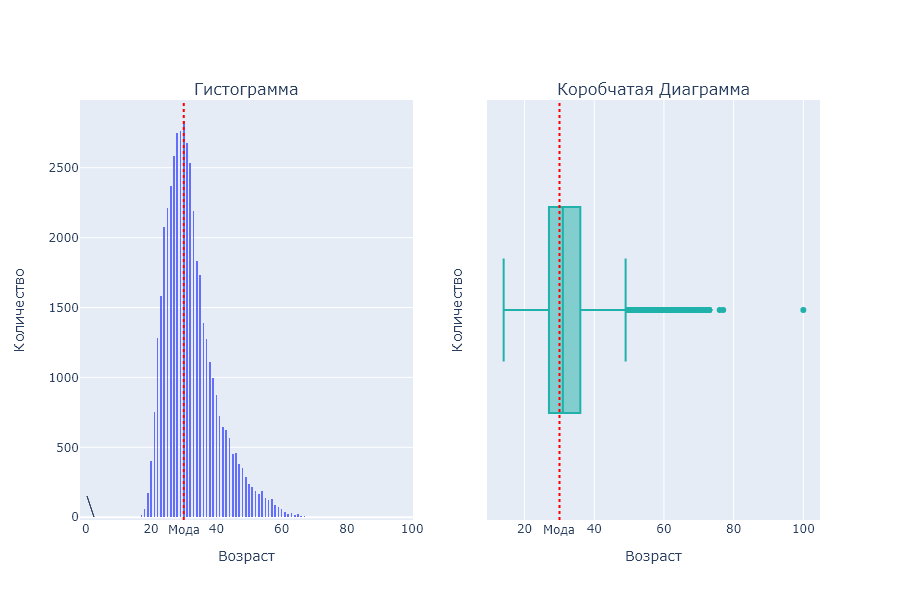

In [9]:
subplot_titles = ['Гистограмма', 'Коробчатая Диаграмма']
rows = 1
columns = 2
xaxis_title="Возраст"
yaxis_title="Количество" 
t_labels = [True, False] #determine which plots will show/hide the tick labels

fig = make_subplots(
    rows=rows, 
    cols=columns, 
    subplot_titles=subplot_titles
)

trace0 = go.Histogram(
    x=hh_dd_copy['Возраст'],
    nbinsx = 175
)

trace1 = go.Box(
    x=hh_dd_copy['Возраст'], 
    marker_color = 'lightseagreen'
)

list_trace = [trace0, trace1]

for i, col in enumerate(subplot_titles):
    # The numpy.ceil() is a mathematical function that returns the ceil of the elements of array. 
    # The ceil of the scalar x is the smallest integer i, such that i >= x
    # in_array = [.5, 1.5, 2.5, 3.5, 4.5, 10.1]
    # ceiloff_values = np.ceil(in_array) => [ 1.  2.  3.  4.  5. 11.]
    r = int(np.ceil(((i+1)/columns)))
    c = i%2+1
    fig.add_trace(list_trace[i], row=r, col=c)
    fig.add_annotation(name = False)
    fig.update_xaxes(title_text=xaxis_title, row=r, col=c)
    fig.update_yaxes(title_text=yaxis_title, row=r, col=c, showticklabels=t_labels[i])

fig.update_layout(height = 600, width = 900, showlegend = False)
fig.add_vline(
    x=hh_dd_copy['Возраст'].mode()[0], 
    line_dash="dot",
    line_color="red", 
    annotation_text="Мода", 
    annotation_position="bottom"    
)

fig.show("png")
fig.write_html("Plotly_html\Exercise_4_1.html")

### Исходя из выше-представленных графиков, можно сделать следующие выводы:

* Как видно из гистограммы, распределение признака "Возраст" ближе к (похоже на) логнормальное распределение с удлиненным правым хвостом.

* Из коробчатой диаграммы следует, что в среднем, выбросов в признаке "Возраст" не много. Данные варьируются в диапазоне от 14 до 100 лет. 

* Большая часть соискателей работы находится в возрасте (промежуток) 27-36 лет с медиальным (модальным) значением возраста равным 31 (30) году.

* Среди аномальных значений можно выделить наблюдения, которые выходят за рамки пенсионного возраста и возраста до совершеннолетия. Однако, следует учесть, что представленые случаи имеют место быть в реальной жизни, что требует дополнительного исследования. К явным аномальным значениям можно (в теории) отнести выборку до 16 лет и старше 70 лет (Однако, стоит провести анализ по другим признакам, чтобы быть уверенным в целесообразности определения данных значений как аномальных).

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

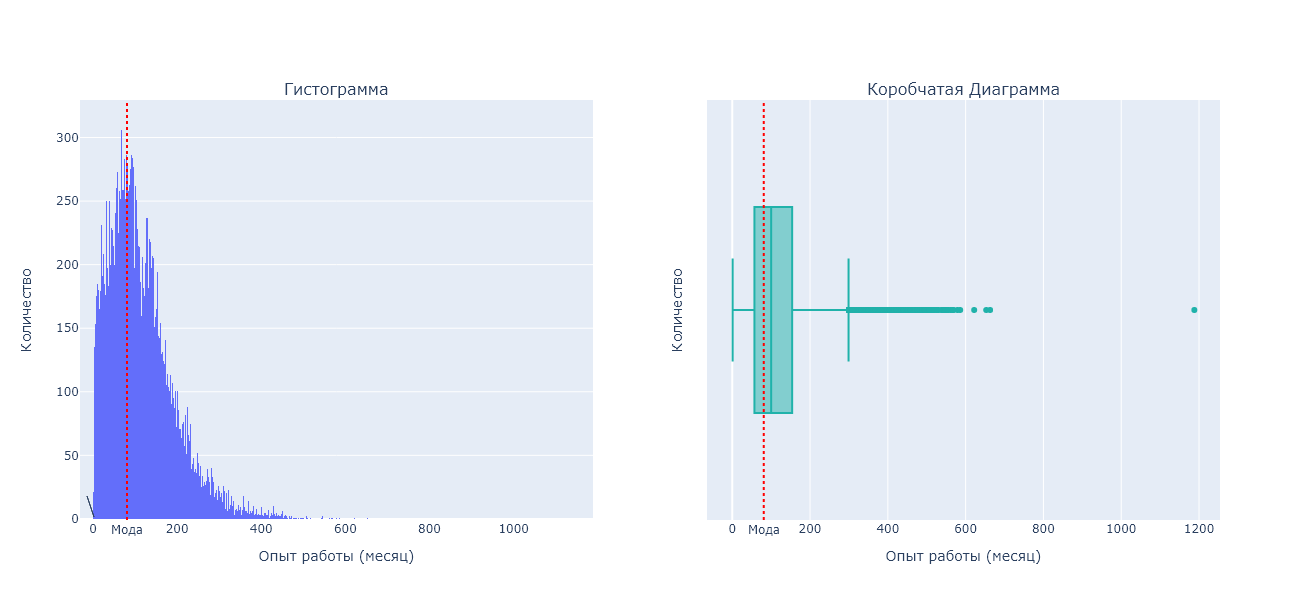

In [10]:
subplot_titles = ['Гистограмма', 'Коробчатая Диаграмма']
rows = 1
columns = 2
xaxis_title = "Опыт работы (месяц)"
yaxis_title = "Количество"
t_labels = [True, False]

fig = make_subplots(
    rows = rows,
    cols = columns,
    subplot_titles=subplot_titles
)

trace0 = go.Histogram(
    x=hh_dd_copy['Опыт работы (месяц)'],
    nbinsx = 1450
)

trace1 = go.Box(
    x=hh_dd_copy['Опыт работы (месяц)'],
    marker_color = 'lightseagreen'
)

list_trace = [trace0, trace1]

for i, col in enumerate(subplot_titles):
    r = int(np.ceil(((i+1)/columns)))
    c = i%2+1
    fig.add_trace(list_trace[i], row=r, col=c)
    fig.add_annotation(name = False)
    fig.update_xaxes(title_text=xaxis_title, row=r, col=c)
    fig.update_yaxes(title_text=yaxis_title, row=r, col=c, showticklabels=t_labels[i])

fig.update_layout(height = 600, width = 1300, showlegend = False)
fig.add_vline(
    x=hh_dd_copy['Опыт работы (месяц)'].mode()[0], 
    line_dash="dot",
    line_color="red", 
    annotation_text="Мода", 
    annotation_position="bottom"    
)

fig.show("png")
fig.write_html("Plotly_html\Exercise_4_2.html")    

### Исходя из выше-представленных графиков, можно сделать следующие выводы:

* Как видно из гистограммы, распределение признака "Опыт работы (месяц)" ближе к (похоже на) логнормальное распределение с удлиненным правым хвостом.

* Из коробчатой диаграммы следует, что в среднем, выбросов в признаке "Опыт работы (месяц)" больше чем в признаке "Возраст". Данные варьируются в диапазоне от 1 до 1188 месяцев. 

* Большая часть соискателей работы находится в промежутке 57-154 месяцев опыта работы с медиальным (модальным) значением опыта равным 100 (81) месяцев.

* Среди аномальных значений можно выделить наблюдения, которые выходят за рамки логических значений опыта работы. К примеру, максимальный опыт работы равен 1188 месяцев, что соответствует 99 годам - это явный выброс. Если представить, что человек начал работать в 16 лет и проработал до 65-67 лет (пенсионный возраст), то максимальным значением должно быть 612 месяцев. Здесь также следует учесть пол и год рождения соискателя работы, т.к. пенсионный возраст напрямую связан с этими параметрами. 

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака ЗП? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


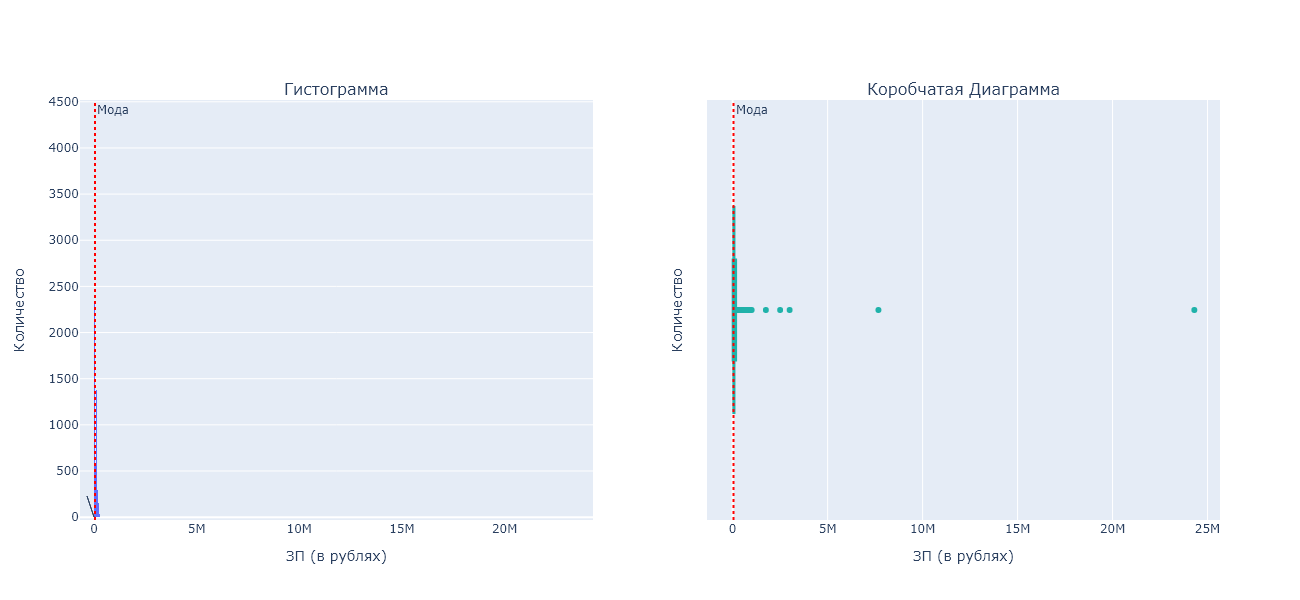

In [11]:
subplot_titles = ['Гистограмма', 'Коробчатая Диаграмма']
rows = 1
columns = 2
xaxis_title = "ЗП (в рублях)"
yaxis_title = "Количество"
t_labels = [True, False]

fig = make_subplots(
    rows = rows,
    cols = columns,
    subplot_titles=subplot_titles
)

trace0 = go.Histogram(
    x=hh_dd_copy['ЗП (руб)'],
    #nbinsx = 1450
)

trace1 = go.Box(
    x=hh_dd_copy['ЗП (руб)'],
    marker_color = 'lightseagreen'
)

list_trace = [trace0, trace1]

for i, col in enumerate(subplot_titles):
    r = int(np.ceil(((i+1)/columns)))
    c = i%2+1
    fig.add_trace(list_trace[i], row=r, col=c)
    fig.add_annotation(name = False)
    fig.update_xaxes(title_text=xaxis_title, row=r, col=c)
    fig.update_yaxes(title_text=yaxis_title, row=r, col=c, showticklabels=t_labels[i])

fig.update_layout(height = 600, width = 1300, showlegend = False)
fig.add_vline(
    x=hh_dd_copy['ЗП (руб)'].mode()[0], 
    line_dash="dot",
    line_color="red", 
    annotation_text="Мода", 
    annotation_position="top right"    
)

fig.show("png")
fig.write_html("Plotly_html\Exercise_4_3.html")    

### Исходя из выше-представленных графиков, можно сделать следующие выводы:

* Как видно из гистограммы, распределиние признака "Опыт работы (месяц)" ближе к (похоже на) логнормальное распределение с ярко выраженным удлиненным правым хвостом.

* Из коробчатой диаграммы следует, что в среднем, выбросы в признаке "Опыт работы (месяц)" начинаются от зарплаты более 181 тыс. рублей. Данные варьируются в диапазоне от 1 до 24.30488 млн. рублей. 

* Большая часть соискателей работы находится в промежутке 37-95 тыс. рублей с медиальным (модальным) значением опыта равным 59 (50) тыс. рублей.

* Выявление аномальных значений довольно нетривиально. Первое, можно предположить, что минимальное значение должно равняться минимальному прожиточному уровню. Однако, данный метом неидеален, т.к. для разных регионов прожиточный уровень разный. Второе, максимальный уровень зарплаты трудно ограничить определенным интервалом, т.к. вакансия может предполагать уникальный опыт или специфичкую работу. Но следует учесть, что макс значение (24.30488 млн. рублей), а также значения выше миллиона рублей выглядят странными и требуют дополнительных исследований (к примеру: опыт работы, уровень квалификации и т.д.)

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

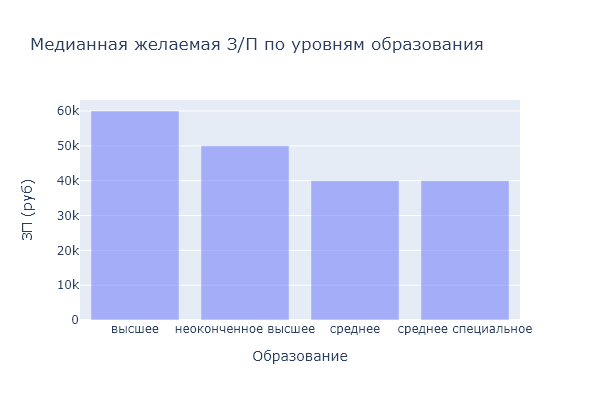

In [12]:
mask = hh_dd_copy[hh_dd_copy['ЗП (руб)']<1000000]

chart_1 = pd.DataFrame(mask.groupby('Образование')['ЗП (руб)'].median())
fig = px.bar(
    chart_1, 
    x = chart_1.index,
    y='ЗП (руб)', 
    title='Медианная желаемая З/П по уровням образования',
    width = 600,
    height= 400,
    barmode='overlay'
)

fig.show("png")
fig.write_html("Plotly_html\Exercise_4_4.html")

### Исходя из выше-представленной диаграммы, можно сделать следующие выводы:

* Как видно из диаграммы, уровень образования имеет значение для определения з/п. К примеру, наименьшая медиальная желаемая зарплата равна 40 тыс. рублей, что соответствует категориям "среднего" и "средне-специального" образования. Тогда как наивысшая медиальная зарплата в полтора раза выше наименьшей медиальной зарплаты и равна 60 тыс. рублей для обладателей "высшего" образования.

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

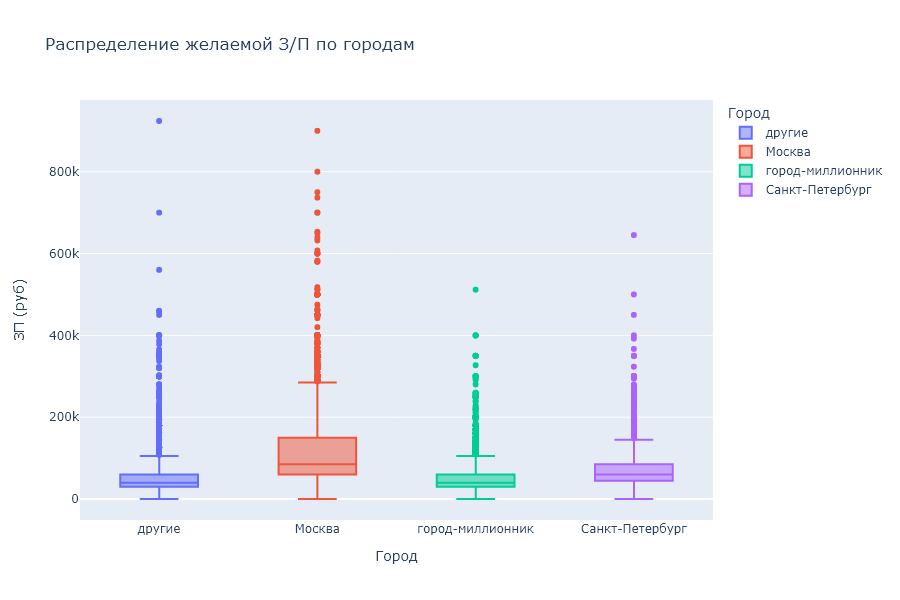

In [13]:
mask = hh_dd_copy[hh_dd_copy['ЗП (руб)']<1000000]

fig = px.box(
    mask, 
    x = mask['Город'],
    y='ЗП (руб)', 
    title='Распределение желаемой З/П по городам',
    width = 900,
    height= 600,
    color = mask['Город']
)

fig.show("png")
fig.write_html("Plotly_html\Exercise_4_5.html")

### Исходя из выше-представленной диаграммы, можно сделать следующие выводы:

* Как видно из диаграммы, местонахождение города имеет значение для определения желаемой з/п. К примеру, наименьшая медиальная запрлата равна 40 тыс. рублей, что соответствует городам в категории "другие" и "город-миллионник". Тогда как наивысшая медиальная зарплата в 2 раза выше наименьшей медиальной зарплаты и равна 85 тыс. рублей, что соответствует городу Москва. Из диаграммы также следует, что нет однозначного соотношения между медиальной желаемой з/п и ее размахом в городах. К примеру, в категории "другие" города, размах з/п составляет от 1 до 924.983 тыс. рублей, тогда как медиальная з/п равна 40 тыс. Напротив, в категории "город-миллионник" размах з/п составляет от 1 до 511.6816 тыс. рублей, но при такой же медиальной з/п - 40 тыс. рублей. 

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

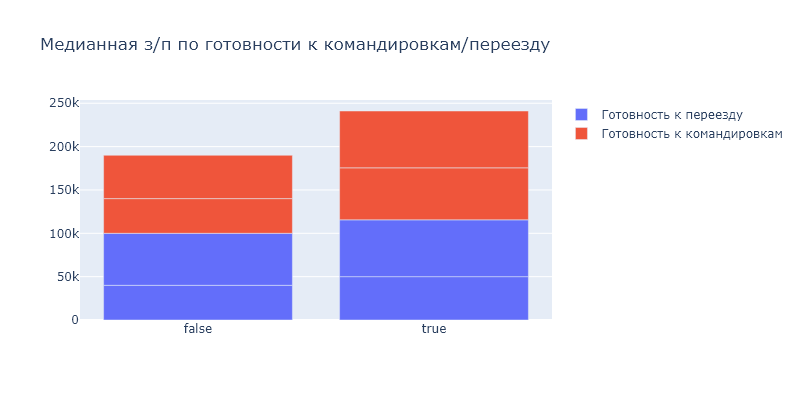

In [14]:
mask = hh_dd_copy[hh_dd_copy['ЗП (руб)']<1000000]
chart_1 = pd.DataFrame(mask.groupby(['Готовность к переезду','Готовность к командировкам'], as_index=False)['ЗП (руб)'].median())

fig = go.Figure()
fig.add_bar(
    x=chart_1['Готовность к переезду'],
    y=chart_1['ЗП (руб)'],
    name='Готовность к переезду'
    )
fig.add_bar(
    x=chart_1['Готовность к командировкам'],
    y=chart_1['ЗП (руб)'],
    name='Готовность к командировкам'
    )
fig.update_layout(
    barmode="relative",
    height = 400, 
    width = 800, 
    #showlegend = False,
    title='Медианная з/п по готовности к командировкам/переезду'
    )
fig.show("png")
fig.write_html("Plotly_html\Exercise_4_6.html")

### Исходя из выше-представленной диаграммы, можно сделать следующие выводы:

* Как видно из диаграммы, медиальная желаемая з/п выше для категории соискателей, которые готовы и к переездам и к командировкам (66 тыс. против 60 тыс.). Медиальная желаемая з/п соискателей, которые не готовы только к переезду (командировкам) равна 40 тыс. (40 тыс.). Напротив, медиальная желаемая з/п соискателей, которые готовы только к переезду (командировкам) равна 50 тыс. (60 тыс.).

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

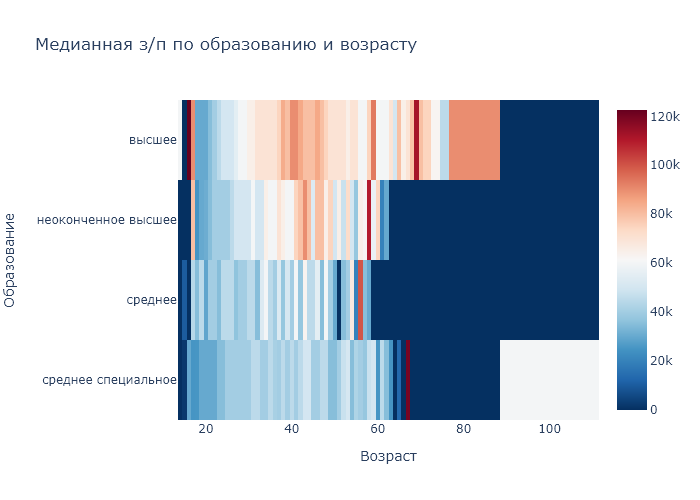

In [15]:
my_pivot = pd.pivot_table(
    hh_dd_copy, 
    values='ЗП (руб)', 
    index ='Образование',
    columns='Возраст',
    aggfunc='median',
    fill_value=0
    )

fig = px.imshow(
    my_pivot,
    text_auto=True, 
    aspect="auto",
    color_continuous_scale='RdBu_r',
    title='Медианная з/п по образованию и возрасту'
    )
fig.show("png")
fig.write_html("Plotly_html\Exercise_4_7.html")

### Исходя из выше-представленной тепловой диаграммы, можно сделать следующие выводы:

* Для высшего образования наблюдается самый быстрый рост желаемой зарплаты относительно возраста.
* Стартовая зарлата выше для обладателей высшего образования.
* Соискатели работы с высшим образованием находятся на рынке труда дольше.
* Пик желаемой зарплаты у обладателей высшего образования приходится на средний возраст (35-45) и ближе к пенсионному. 
* Вторым по привлекательности (относительно роста желаемой зарплаты) являются обладатели неоконченного высшего образования.
* Среднее специальное образование наименее быстро растущее относительно з/п.

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

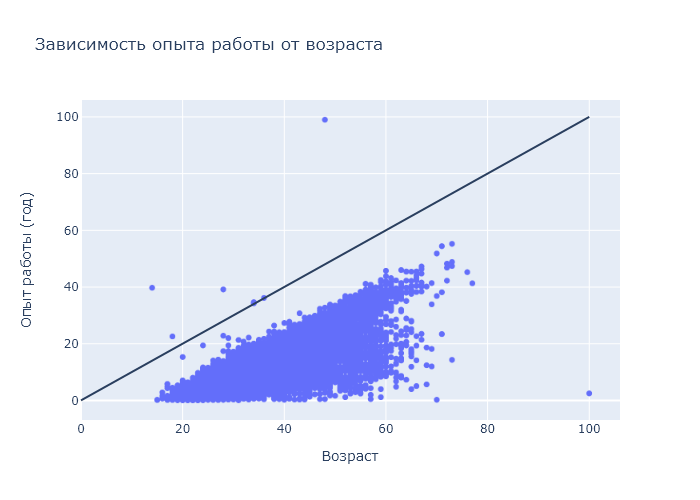

In [16]:
fig = px.scatter(
    hh_dd_copy, 
    x= "Возраст", 
    y= hh_dd_copy["Опыт работы (месяц)"]/12,
    title = 'Зависимость опыта работы от возраста',
    width = 700
)

fig.update_layout(
    shapes = [{'type': 'line', 
               'y0': 0, 
               'y1': 100, 
               'x0': 0, 
               'x1': 100}]
    )
fig.update_yaxes(title_text='Опыт работы (год)')
fig.show("png")
fig.write_html("Plotly_html\Exercise_4_8.html")

### Исходя из выше-представленной диаграммы рассеяния, можно сделать следующие выводы:

* Наблюдается позитивная зависимость опыта работы от возраста (логично).
* Есть выбросы, которые показывают, что опыт работы больше возраста (пример: возраст 28 лет, опыт работы - 39). Это аномальные значения, которые возникли, вероятно, при неправильном заполнении данных.
* Также наблюдается значение возраста в 100 лет при опыте работы в 2 года, что тоже скорее всего свидетельствует об аномальном значении.

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


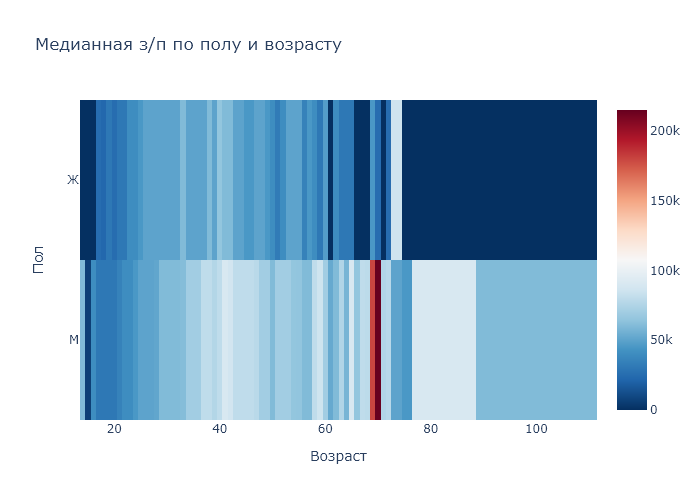

In [17]:
my_pivot = pd.pivot_table(
    hh_dd_copy, 
    values='ЗП (руб)', 
    index ='Пол',
    columns='Возраст',
    aggfunc='median',
    fill_value=0
    )

fig = px.imshow(
    my_pivot,
    text_auto=True, 
    aspect="auto",
    color_continuous_scale='RdBu_r',
    title='Медианная з/п по полу и возрасту'
    )
fig.show("png")
fig.write_html("Plotly_html\Exercise_Extra_1.html")

### Исходя из выше-представленной тепловой диаграммы, можно сделать следующие выводы:

* Для мужчин наблюдается самый быстрый рост желаемой зарплаты относительно возраста.
* Стартовая зарлата выше для мужчин.
* Мужчины находятся на рынке труда дольше.
* В возрасте от 28 до 71 у мужчин наблюдается большая желаемая медиальная зарплата.
* Пик желаемой медиальной зарплаты для мужчин приходится на возраст 68-70 лет.

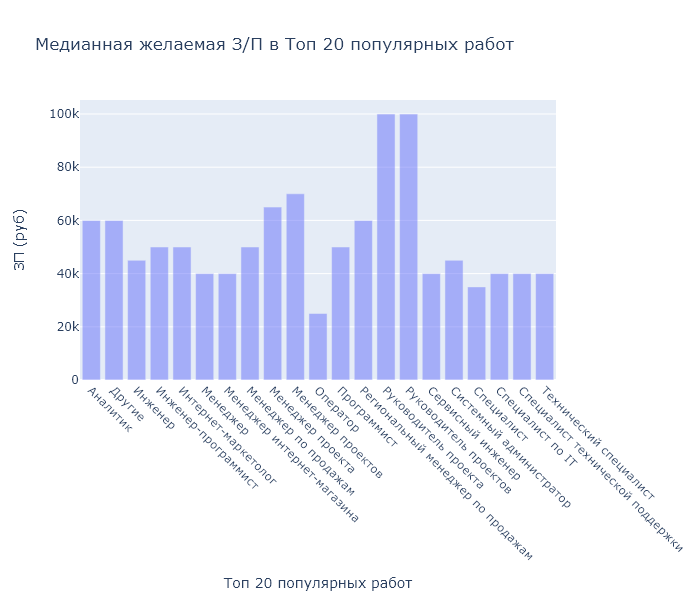

In [18]:
#Выявляем 20 популярных должностей
popular_job = hh_dd_copy['Ищет работу на должность:'].value_counts(normalize=True).nlargest(20).index
hh_dd_copy['popular_job'] = hh_dd_copy['Ищет работу на должность:'].apply(lambda x: x if x in popular_job else 'Другие')
mask = hh_dd_copy[hh_dd_copy['ЗП (руб)']<1000000]

chart_1 = pd.DataFrame(mask.groupby('popular_job')['ЗП (руб)'].median())
fig = px.bar(
    chart_1, 
    x=chart_1.index,
    y='ЗП (руб)', 
    title='Медианная желаемая З/П в Топ 20 популярных работ',
    width = 700,
    height= 600,
    barmode='overlay'
)
fig.update_xaxes(title_text='Топ 20 популярных работ', tickangle=45)
fig.show("png")
fig.write_html("Plotly_html\Exercise_Extra_2.html")

# Удаляем ненужную колонку
hh_dd_copy = hh_dd_copy.drop('popular_job', axis=1)  

### Исходя из выше-представленной диаграммы, можно сделать следующие выводы:

* Наибольшая желаемая медиальная зарплата у руководителей проектов (100 тыс. рублей).
* Вторая наибольшая желаемая зарплата у менеджера проектов (70 тыс. рублей).
* Аналитики и региональные менеджера продаж (60 тыс. рублей).
* Наименьшая желаемая медиальная зарплата у операторов.
> ***Важно:*** как видно из названия позиций (работ), топ 20 составлена не идеально т.к. есть повторения (пример: Руководитель проетов и Руководитель проекта). Однако, данная диаграмма дает нам начальное представление о топ 20 работах и желаемой зарплате.  

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [19]:
duplicates = hh_dd_copy[hh_dd_copy.duplicated(subset=hh_dd_copy.columns)]
data_no_duplic = hh_dd_copy.drop_duplicates()
print(duplicates.shape[0])

158


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [20]:
cols_null_amount = data_no_duplic.isnull().sum()
display(cols_null_amount[cols_null_amount>0])

Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Опыт работы (месяц)                168
dtype: int64

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [21]:
pd.options.mode.chained_assignment = None # default='warn'
df_drop_raws = data_no_duplic.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'], how='any', axis=0)
df_drop_raws['Опыт работы (месяц)'] = df_drop_raws['Опыт работы (месяц)'].fillna(df_drop_raws['Опыт работы (месяц)'].median())
print("Среднее значение в признаке 'Опыт работы (месяц)' -", round(df_drop_raws['Опыт работы (месяц)'].mean()))

Среднее значение в признаке 'Опыт работы (месяц)' - 114


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [22]:
outliers = df_drop_raws[(df_drop_raws['ЗП (руб)']>1000000) | (df_drop_raws['ЗП (руб)']<1000)]
df_drop_raws = df_drop_raws.drop(outliers.index)
print('Количество выбросов -', outliers.shape[0])

Количество выбросов - 89


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [23]:
outliers_2 = df_drop_raws[df_drop_raws["Опыт работы (месяц)"]/12>df_drop_raws["Возраст"]]
df_drop_raws = df_drop_raws.drop(outliers_2.index)
print('Количество выбросов -', outliers_2.shape[0])

Количество выбросов - 7


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

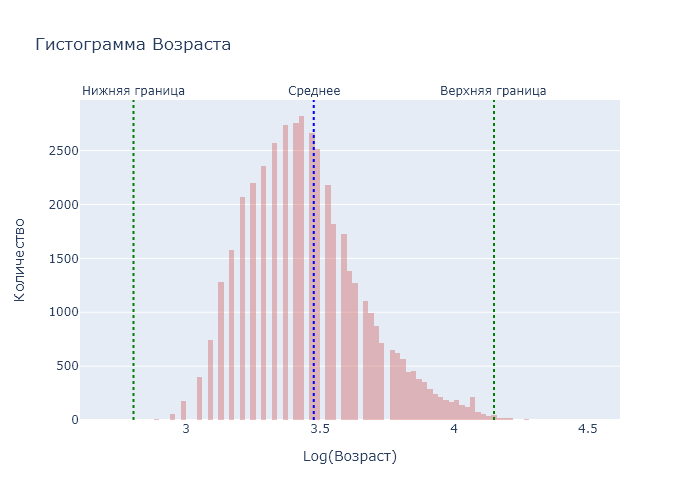

Асимметрия распределения признака возраст - 0
Число выбросов по методу z-отклонения: 4
Соискатели с данным возрастом попадают под категорию выбросов:
 29098     14
31137     15
32950     15
33654    100
Name: Возраст, dtype: int64


In [24]:
fig = px.histogram(df_drop_raws, 
                   x=np.log(df_drop_raws["Возраст"]+1),
                   title='Гистограмма Возраста',
                   opacity=0.4,
                   nbins=170,
                   #log_x=True, # represent bars with log scale
                   color_discrete_sequence=['indianred'] # color of histogram bars
                   )

# Подсчитываем среднее значение признака 'Возраст'
fig.add_vline(
    x=np.log(hh_dd_copy['Возраст']+1).mean(), 
    line_dash="dot",
    line_color="blue", 
    annotation_text="Среднее", 
    annotation_position="top"    
)

# Подсчитываем линии метода 3х сигм - нижняя граница
fig.add_vline(
    x= np.log(hh_dd_copy['Возраст']+1).mean() - 3*np.log(hh_dd_copy['Возраст']+1).std(), 
    line_dash="dot",
    line_color="green", 
    annotation_text="Нижняя граница", 
    annotation_position="top"    
)

# Подсчитываем линии метода 3х сигм - верхняя граница
fig.add_vline(
    x= np.log(hh_dd_copy['Возраст']+1).mean() + 3*np.log(hh_dd_copy['Возраст']+1).std(), 
    line_dash="dot",
    line_color="green", 
    annotation_text="Верхняя граница", 
    annotation_position="top"    
)

fig.update_yaxes(title_text='Количество')
fig.update_xaxes(title_text='Log(Возраст)')

fig.show("png")
fig.write_html("Plotly_html\Exercise_5_6.html")

print('Асимметрия распределения признака возраст -', round(np.log(hh_dd_copy['Возраст']+1).skew()))


def outliers_z_score(data, feature, log_scale=False, left = 3, right = 3):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mean = x.mean()
    std =x.std()
    lower_bound = mean - left*std
    upper_bound = mean + right*std
    outliers = data[(x<lower_bound) | (x>upper_bound)]
    clean_data = data[(x>lower_bound) & (x<upper_bound)]
    return outliers, clean_data

outliers, cleaned = outliers_z_score(hh_dd_copy, 'Возраст', log_scale=True, right=4) 
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print('Соискатели с данным возрастом попадают под категорию выбросов:\n',  outliers['Возраст'])       

### Исходя из выше-представленной гистограммы, можно сделать следующие выводы:

* Распределение признака "Возраст" в логарифмическом масштабе близко к нормальному.
* Стоит отметить, что асимметрия распределения признака "Возраст" в логарифмическом масштабе равна 0.47, что свидетельствует о правосторонней асимметрии. 
* Следуя правилу 3х сигм, на гистограмме отчетливо видны выбросы. 
* Соискатели с возрастом 14, 15 и 100 лет подпадают под выбросы. 